#**Real Time OMR Sheet Reading Using Computer Vision**

It has two parts:

1) Detection: This part is automatic any sheet having black rectangular/square boxes on three sides can be used.
2) Answering Part: Here answer is shown according to the sheet used.

## Detection

In [1]:
#################### Importing Libraries ##################

import cv2
import numpy as np
import imutils
import collections
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
############### Parameters #######################
image_name='6.jpg'
image_dic='E:/innateProjects/omr/OMR FInal Code/Real sample/'
output_dic='E:/innateProjects/omr/OMR FInal Code/Output Excel Results/'
output_symbol_number=str(image_name)+'_symbol_number.xlsx'
output_result=str(image_name)+'_results.xlsx'
image_width=640
image_height=720
Gaussian_Blur_kernel=(9,9)
min_threshold_value=50
max_threshold_value=100
contour_color=(0,0,255)
Thickness_contour=1
horizontal_tolorance=10
vertical_tolorance=15
FIGSIZE=(14,7)

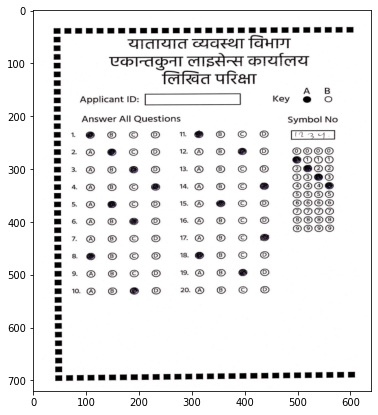

In [ ]:
#################################### Show Original Image #####################

img=cv2.imread(str(image_dic)+str(image_name))
img = cv2.resize(img, (image_width,image_height), interpolation = cv2.INTER_AREA)
fig=plt.figure(figsize=FIGSIZE)
plt.imshow(img)
plt.show()

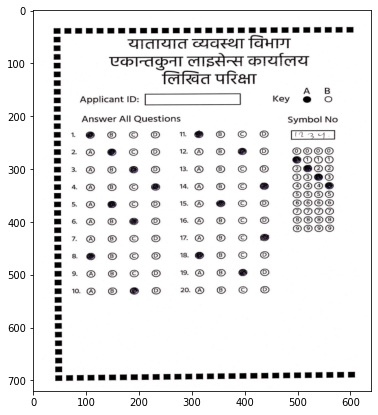

In [ ]:
############################## Draw Contours #########################
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,Gaussian_Blur_kernel,0)
th, threshed = cv2.threshold(blur, min_threshold_value, max_threshold_value,
    cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(threshed,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
co=[] 
for cnt in contours:
    M = cv2.moments(cnt)
    if M['m00']!=0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        center = (cx, cy)
    else:
        center=(0,0)
    
    co.append(center)
img2=img.copy()
cv2.drawContours(img2,contours,-1,contour_color,thickness=Thickness_contour)
# cv2.imshow('img',img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()
fig=plt.figure(figsize=FIGSIZE)
plt.imshow(img)
plt.show()

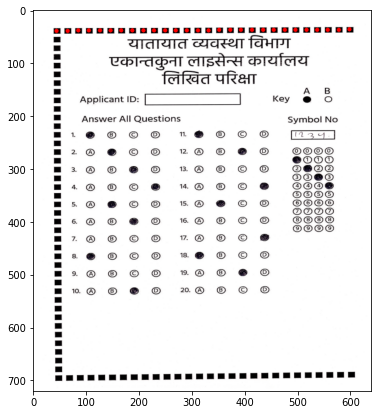

In [ ]:
######################### Detect Upper Reactangular boxes ##################

vhu=[]
for i in range(0,horizontal_tolorance):
    vhu.append(i)
hu=[]
for i in range(0,len(co)):
    for j in vhu:
            
        if (co[-1][1]-j ==co[i][1])or (co[-1][1]+j==co[i][1]):
            hu.append(co[i])

for i in range(0,len(hu)):
    img = cv2.circle(img, hu[i], radius=4, color=(255, 0, 0), thickness=-1)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig=plt.figure(figsize=FIGSIZE)
plt.imshow(img)
plt.show()

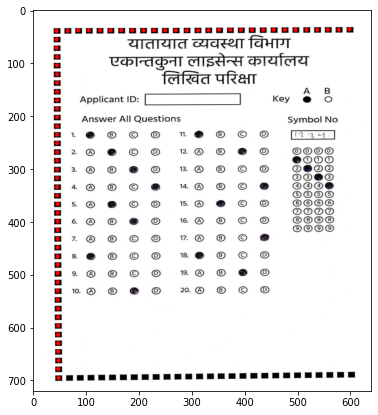

In [ ]:
#################### Detect Left Rectangular Boxes ##################

vvp=[]
for i in range(0,vertical_tolorance): 
    vvp.append(i)
vp=[]
for i in range(0,len(co)):
    for j in vvp:    
        if (min(hu)[0]-j ==co[i][0])or (min(hu)[0]+j==co[i][0]):
            vp.append(co[i])
for i in range(0,len(vp)):
    img = cv2.circle(img, vp[i], radius=4, color=(255, 0, 0), thickness=-1)

if len(vp)%2!=0:
    ha1=int((len(vp)-1)/2)
    ha2=int((len(vp)+1)/2)
else:
    ha1=int(len(vp)/2)
    ha2=int(len(vp)/2)
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig=plt.figure(figsize=FIGSIZE)
plt.imshow(img)
plt.show()

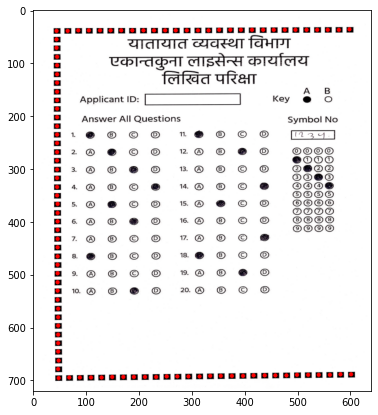

In [ ]:
###################### Detect Lower Rectangular Boxes ##################


vhl=[]
for i in range(0,horizontal_tolorance):
    vhl.append(i)
hl=[]
for i in range(0,len(co)):
    for j in vhl:    
        if (vp[0][1]-j ==co[i][1])or (vp[0][1]+j==co[i][1]):
            hl.append(co[i])

for i in range(0,len(hl)):
    img = cv2.circle(img, hl[i], radius=4, color=(255, 0, 0), thickness=-1)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig=plt.figure(figsize=FIGSIZE)
plt.imshow(img)
plt.show()

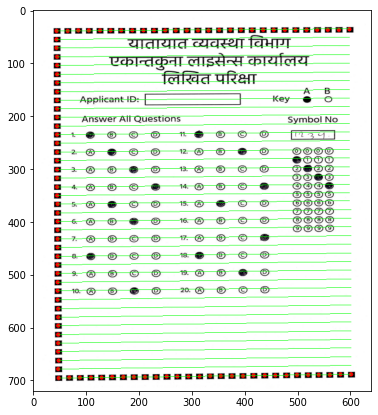

In [ ]:
################################# Draw Horizonal Lines ####################

lower_red = np.array([0, 0, 240]) 
upper_red= np.array([0, 0, 255])
mask = cv2.inRange(img, lower_red, upper_red)

contours2, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cu=[] 
for cnt in contours2:
    M = cv2.moments(cnt)
    if M['m00']!=0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        center = (cx, cy)
    else:
        center=(0,0)
    
    cu.append(center)

shl=sorted(hl)
y2=shl[-1][1]
y1=shl[0][1]
x2=shl[-1][0]
x1=shl[0][0]
s=(y2-y1)/(x2-x1)
shu=sorted(hu)
shl=sorted(hl)
svp=sorted(vp,key=lambda svp:svp[1])


y2l=shl[-1][1]
y1l=shl[0][1]
x2l=shl[-1][0]
x1l=shl[0][0]
mhl=(y2l-y1l)/(x2l-x1l)


y2u=shu[-1][1]
y1u=shu[0][1]
x2u=shu[-1][0]
x1u=shu[0][0]
mhu=(y2u-y1u)/(x2u-x1u)

mhll=(y2l-y1l)/(x2l-x1l)
mhuu=(y2u-y1u)/(x2u-x1u)

av= (mhll+mhuu)/2

dl=(mhll-av)/ha1

ml=[]
for i in range(0,ha1):
    b=mhl-(dl)
    
    ml.append(b)
    mhl=b
y2nl=[]
for i in range(0,ha1):
    y2nl.append(int(ml[i]*(shl[-1][0]-svp[-i-1][0])+svp[-i-1][1]))

for i in range(0,ha1):   
    color = (0, 255, 0)
    pt1=svp[-i-1]
    pt2=(shl[-1][0],y2nl[i])
    cv2.line(img, pt1, pt2,color)

du=(mhuu-av)/ha1
mu=[]
for i in range(0,ha2):
    c=mhu-(du)
    mu.append(c)
    mhu=c
y2nu=[]
for i in range(0,ha2):
    y2nu.append(int(mu[i]*(shu[-1][0]-svp[i][0])+svp[i][1]))
for i in range(0,ha2):       
    color = (0, 255, 0)
    pt3=svp[i]
    pt4=(shu[-1][0],y2nu[i])
    cv2.line(img, pt3, pt4,color)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig=plt.figure(figsize=FIGSIZE)
plt.imshow(img)
plt.show()

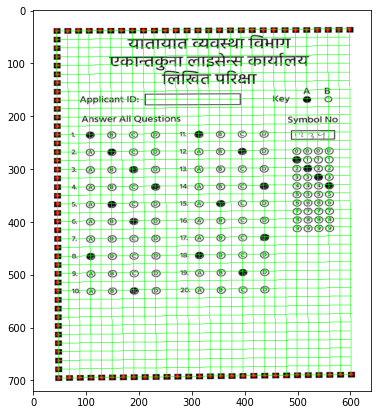

In [ ]:
########################### Draw Vertical Lines ##############################

for i in range(len(hu)):
    color = (0, 255, 0)
    pt5=shu[i]
    pt6=shl[i]
    cv2.line(img, pt5, pt6,color)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
fig=plt.figure(figsize=FIGSIZE)
plt.imshow(img)
plt.show()

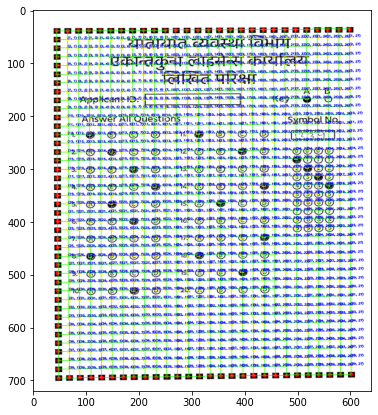

In [ ]:
######################### Find intersect of lines and draw rectangular boxes with labels ###################

y2n=y2nu+y2nl
y2n=sorted(y2n)

x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
x4=[]
y4=[]

for i in range(0,len(svp)):
    x1.append(svp[i][0])
    y1.append(svp[i][1])
    x2.append(shu[-1][0])
    y2.append(y2n[i])
    

for i in range(0,len(shu)):
    
    
    x3.append(shu[i][0])
    y3.append(shu[i][1])
    x4.append(shl[i][0])
    y4.append(shl[i][1])
px=[]
py=[]
for j in range(0,len(shu)):
    for i in range(0,len(svp)):
        
        px.append(int(( (x1[i]*y2[i]-y1[i]*x2[i])*(x3[j]-x4[j])-(x1[i]-x2[i])*(x3[j]*y4[j]-y3[j]*x4[j]) ) / ( (x1[i]-x2[i])*(y3[j]-y4[j])-(y1[i]-y2[i])*(x3[j]-x4[j])))) 
        py.append(int(((x1[i]*y2[i]-y1[i]*x2[i])*(y3[j]-y4[j])-(y1[i]-y2[i])*(x3[j]*y4[j]-y3[j]*x4[j]) ) / ( (x1[i]-x2[i])*(y3[j]-y4[j])-(y1[i]-y2[i])*(x3[j]-x4[j]))))
ivs=[]
for i in range(0,len(px)):
    ivs.append((px[i],py[i]))
bb=[]
cc=[]
dd=[]
for i in range(len(vp)):
    bb.append(len(vp)*i)
    cc.append(i)
    dd.append(len(vp)*i-1)
rec=[]
rop=[]
for i in range(1,len(ivs)):
    
    if (i in (bb)) or (i in (cc))or (i in (dd)):
        continue
    
    rec.append(((ivs[i][0]-3,ivs[i][1]-3),(ivs[i][0]+3,ivs[i][1]+3)))
    rop.append(ivs[i])
for i in range(0,len(rec)):
     img=cv2.rectangle(img,rec[i][0], rec[i][1],(255,0,0),1)


coh=[]
for i in range(1,len(hu)):
    coh.append(i)
cov=[]
for i in range(1,len(vp)-1):
    cov.append(i)
coa=[]
for j in range(0,len(coh)):
    for i in range(0,len(cov)):
       coa.append((cov[i],coh[j]))

ar=[]
for i in range(0,len(rec)):
    cv2.rectangle(img,rec[i][0], rec[i][1],(255,255,0),1)
    roi=img[rec[i][0][1]:rec[i][1][1],rec[i][0][0]:rec[i][1][0]]
    if roi.mean()>100:
        
        pass

    else:
        ar.append(i)
for i in range(0,len(rop)):
    img=cv2.putText(img,str(coa[i]),rop[i],cv2.FONT_HERSHEY_PLAIN,0.38,(0,0,255),1,cv2.LINE_AA)


# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
fig=plt.figure(figsize=FIGSIZE)
plt.imshow(img)
plt.show()

For another type of sheet

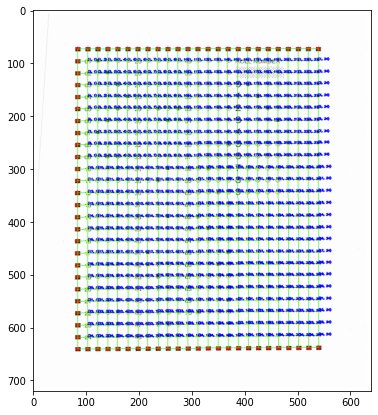

# Answering Part

In [ ]:
################# Coordinates Where Answer are Marked ##########################
ans=[]
for i in ar:
    ans.append(coa[i])
print(ans)


[(12, 3), (26, 3), (14, 5), (20, 5), (16, 7), (22, 7), (30, 7), (18, 9), (12, 13), (26, 13), (20, 15), (14, 17), (28, 17), (18, 19), (24, 19), (15, 22), (8, 23), (16, 23), (17, 24), (18, 25)]


Coordinates represent Question number and option. For eg: (12,3) is assigned as Question no. 1 and option a i.e. 1a

In [ ]:
################################# For Answers #####################

an=[]
for i in range(1,21):
    for j in ['a','b','c','d']:
        an.append((i,str(j)))

au=[]
for i in range(12,31,2):
    for j in range(3,11,2):
        au.append((i,j))
       
for i in range(12,31,2):
    for j in range(13,20,2):
        au.append((i,j))

aun=dict(zip(au,an))

print(aun)

{(12, 3): (1, 'a'), (12, 5): (1, 'b'), (12, 7): (1, 'c'), (12, 9): (1, 'd'), (14, 3): (2, 'a'), (14, 5): (2, 'b'), (14, 7): (2, 'c'), (14, 9): (2, 'd'), (16, 3): (3, 'a'), (16, 5): (3, 'b'), (16, 7): (3, 'c'), (16, 9): (3, 'd'), (18, 3): (4, 'a'), (18, 5): (4, 'b'), (18, 7): (4, 'c'), (18, 9): (4, 'd'), (20, 3): (5, 'a'), (20, 5): (5, 'b'), (20, 7): (5, 'c'), (20, 9): (5, 'd'), (22, 3): (6, 'a'), (22, 5): (6, 'b'), (22, 7): (6, 'c'), (22, 9): (6, 'd'), (24, 3): (7, 'a'), (24, 5): (7, 'b'), (24, 7): (7, 'c'), (24, 9): (7, 'd'), (26, 3): (8, 'a'), (26, 5): (8, 'b'), (26, 7): (8, 'c'), (26, 9): (8, 'd'), (28, 3): (9, 'a'), (28, 5): (9, 'b'), (28, 7): (9, 'c'), (28, 9): (9, 'd'), (30, 3): (10, 'a'), (30, 5): (10, 'b'), (30, 7): (10, 'c'), (30, 9): (10, 'd'), (12, 13): (11, 'a'), (12, 15): (11, 'b'), (12, 17): (11, 'c'), (12, 19): (11, 'd'), (14, 13): (12, 'a'), (14, 15): (12, 'b'), (14, 17): (12, 'c'), (14, 19): (12, 'd'), (16, 13): (13, 'a'), (16, 15): (13, 'b'), (16, 17): (13, 'c'), (16,

In [ ]:
########################### For Symbol number #####################
if ((8,23) or (8,25)) in ans:
    ki=0
  
else:
    ki=1       
if ki==1:
    print("NO KEY INSERT")
    cv2.imshow('img',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    k={(8,23):(0,'A'),(8,25):(0,'B')}

    sn=[]
    for i in range(0,10):
        for j in ['insert','insert','insert','insert']:
            sn.append((i,str(j)))
    snn=[]
    for i in range(14,24):
        for j in range(22,26):
            snn.append((i,j))
    sun=dict(zip(snn,sn))

In [ ]:
############################# Find and Show symbol numbers and answers ######################


ds= k.copy()
ds.update(sun)
das=aun.copy()
das.update(ds)
zer=[]
for j in range(0,len(coh)):
    for i in range(0,len(cov)):
        zer.append(0)

zd=dict(zip(coa,zer))
fd=zd.copy()
fd.update(das)

rr= [fd[k] for k in ans]

rs=[]
for i in range(0,len(rr)):
    if rr[i][0]==0:
        rs.append(rr[i][1])
for i in range(0,len(rr)):
    if rr[i][1]=='insert':
        rs.append(rr[i][0])
ds=pd.DataFrame(rs)
ra=[]
for i in range(0,len(rr)):
    if rr[i][0] != 0 and rr[i][1] != 'insert' :
        ra.append(rr[i])
dr=pd.DataFrame(sorted(ra))

print('Symbol numbers:',rs)
print('Answers :',ra)


Symbol numbers: ['A', 1, 2, 3, 4]
Answers : [(1, 'a'), (8, 'a'), (2, 'b'), (5, 'b'), (3, 'c'), (6, 'c'), (10, 'c'), (4, 'd'), (11, 'a'), (18, 'a'), (15, 'b'), (12, 'c'), (19, 'c'), (14, 'd'), (17, 'd')]


In [ ]:
########################## Save in excel format #################
ds.to_excel(str(output_dic)+str(output_symbol_number), header=False, index=False)
dr.to_excel(str(output_dic)+str(output_result), header=False, index=False)

# Output in excel format


For Symbol number

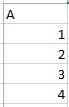

For answer

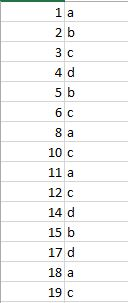